In [1]:
!python --version

Python 3.12.12


### LangGraph : StateGraph

Components & Capabilities -

* State : The data which flows through the graph
* Node : Functions that are applied to that data
* Edges : This is the control flow (e.g. serial, parallel, conditional)
* Checkpointing / Memory of the states
* Human in the Loop : It is done through Interrupts

In [3]:
from IPython.display import Image, display
import operator
from typing import Annotated, List, Literal, TypedDict
from langgraph.graph import END, START, StateGraph
from langgraph.types import Command, interrupt

Here we will build this graph with one node "a"

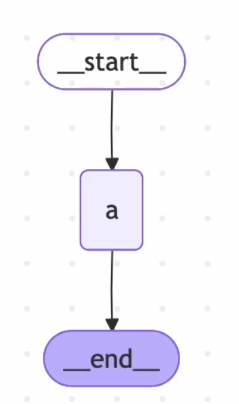

In [4]:
# Define the State which is the Data that will flow through the graph
# Note: here we have defined the state as a TypedDict, it can as well be Python Dataclass or Pydantic Basemodel

class State(TypedDict):
    nList: List[str]  # key : value

In [5]:
# Let's define the node "a" which is the function that takes the State as an input and gives the state as an output

def node_a(state: State) -> State:
    print(f"node a is receiving {state["nList"]}") # step - 1
    note = "Hello World from Node a" # step - 2
    return(State(nList = [note]))

In [6]:
# Build the state graph

builder = StateGraph(State)
builder.add_node("a", node_a)
builder.add_edge(START, "a")
builder.add_edge("a", END)
graph = builder.compile()

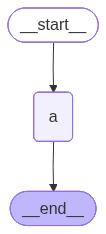

In [7]:
display(Image(graph.get_graph().draw_mermaid_png()))

In [11]:
print(graph.get_graph().draw_mermaid())

---
config:
  flowchart:
    curve: linear
---
graph TD;
	__start__([<p>__start__</p>]):::first
	a(a)
	__end__([<p>__end__</p>]):::last
	__start__ --> a;
	a --> __end__;
	classDef default fill:#f2f0ff,line-height:1.2
	classDef first fill-opacity:0
	classDef last fill:#bfb6fc



In [12]:
# Define the initial state and invoke the graph

initial_state = State(
    nList = ["Hello Node a, how are you?"]
)

graph.invoke(initial_state)

node a is receiving ['Hello Node a, how are you?']


{'nList': ['Hello World from Node a']}

#### Extend the above graph further

1. Adding another node to the graph and it with edges.
2. Modify the print statement in the node function or change the initial state message
3. Extend the State TypedDict with additional fields to pass more data between nodes

In [23]:
def node_b(state: State) -> State:
    print(f"Node b is receiving {state["nList"]}")
    note = "Hello World from node b"
    return(State(nList = [note]))

In [24]:
# Build the Stategraph

builder = StateGraph(State)
builder.add_node("a", node_a)
builder.add_node("b", node_b)
builder.add_edge(START, "a")
builder.add_edge("a", "b")
builder.add_edge("b", END)
graph = builder.compile()

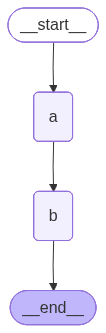

In [25]:
display(Image(graph.get_graph().draw_mermaid_png()))

In [26]:
# Define the initial state and invoke the graph -

initial_state = State(
    nList = ["Hello node a, how are you ?", "I am extending the State Class"]
)

graph.invoke(initial_state)

node a is receiving ['Hello node a, how are you ?', 'I am extending the State Class']
Node b is receiving ['Hello World from Node a']


{'nList': ['Hello World from node b']}